# Term Deposit Subscription Modelling

# Question

* What features are important to get customers subscribe in the term deposit.
* How campaign affect the conversion? 
* Try to build a model to predict whether customers will subscribe for term deposit.

In [1]:
# Imports
from category_encoders import *
import numpy as np
import pandas as pd
from sklearn.compose import *
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, IsolationForest
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import *
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.metrics import balanced_accuracy_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import *
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bank.csv')

# Abstract: 


The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. 

# Sources

The dataset is public available for research.

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

# Load Data

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Fortunately, there are no missing values. If there were missing values we will have to fill them with the median, mean or mode.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.describe

<bound method NDFrame.describe of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact 

In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.024182,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.420988,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
category_features = df.select_dtypes(include=['object', 'bool']).columns.values

for col in category_features:
    print(col, "(", len(df[col].unique()) , "values):\n", np.sort(df[col].unique()))

job ( 12 values):
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital ( 4 values):
 ['divorced' 'married' 'single' 'unknown']
education ( 8 values):
 ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
default ( 3 values):
 ['no' 'unknown' 'yes']
housing ( 3 values):
 ['no' 'unknown' 'yes']
loan ( 3 values):
 ['no' 'unknown' 'yes']
contact ( 2 values):
 ['cellular' 'telephone']
month ( 10 values):
 ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
day_of_week ( 5 values):
 ['fri' 'mon' 'thu' 'tue' 'wed']
poutcome ( 3 values):
 ['failure' 'nonexistent' 'success']
y ( 2 values):
 ['no' 'yes']


In [10]:
print("Job:",df.job.value_counts(),sep = '\n')
print("-"*40)
print("Marital:",df.marital.value_counts(),sep = '\n')
print("-"*40)
print("Education:",df.education.value_counts(),sep = '\n')
print("-"*40)
print("Default:",df.default.value_counts(),sep = '\n')
print("-"*40)
print("Housing loan:",df.housing.value_counts(),sep = '\n')
print("-"*40)
print("Personal loan:",df.loan.value_counts(),sep = '\n')
print("-"*40)
print("Contact:",df.contact.value_counts(),sep = '\n')
print("-"*40)
print("Month:",df.month.value_counts(),sep = '\n')
print("-"*40)
print("day_of_week :",df.day_of_week .value_counts(),sep = '\n')
print("-"*40)
print("Previous outcome:",df.poutcome.value_counts(),sep = '\n')
print("-"*40)
print("Outcome of this campaign:",df.y.value_counts(),sep = '\n')
print("-"*40)

Job:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
----------------------------------------
Marital:
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
----------------------------------------
Education:
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
----------------------------------------
Default:
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
----------------------------------------
Housing loan:
yes        21576
no         18622
unknown      

# Data Cleaning and Feature Engineering

The data is only appears clean, but after examining the categorical variables I found that many of them had unknown values. It's hard to say what to do since many of the variables didn't have a clear value to replace the unknown value to. For now, I will examine the variables as they are while changing the target variable into a quantitative one.

In [11]:
# Removing Duplicate Values

print(df.duplicated().sum()) # 12 duplicate values 
df = df.drop_duplicates() # Values have been removed

12


In [12]:
# Checking for null values
df.isnull().values.any()

False

attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

In [13]:
print("# Missing job: {0}".format(len(df.loc[df['job'] == "unknown"])))
print("# Missing marital: {0}".format(len(df.loc[df['marital'] == "unknown"])))
print("# Missing education: {0}".format(len(df.loc[df['education'] == "unknown"])))
print("# Missing default: {0}".format(len(df.loc[df['default'] == "unknown"])))
print("# Missing housing:: {0}".format(len(df.loc[df['housing'] == "unknown"])))
print("# Missing loan: {0}".format(len(df.loc[df['loan'] == "unknown"])))
print("# Missing contact: {0}".format(len(df.loc[df['contact'] == "unknown"])))
print("# Missing month: {0}".format(len(df.loc[df['month'] == "unknown"])))
print("# Missing day_of_week: {0}".format(len(df.loc[df['day_of_week'] == "unknown"])))
print("# Missing poutcome: {0}".format(len(df.loc[df['poutcome'] == "unknown"])))

# Missing job: 330
# Missing marital: 80
# Missing education: 1730
# Missing default: 8596
# Missing housing:: 990
# Missing loan: 990
# Missing contact: 0
# Missing month: 0
# Missing day_of_week: 0
# Missing poutcome: 0


In [14]:
#Term Deposit Subscription (Target) 
# Yes = 1 and No = 0
df['y'] = 1 * (df['y']== 'yes')

<ipython-input-14-35c52cb8593c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = 1 * (df['y']== 'yes')


In [15]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


# Exploratory Data Analysis

<AxesSubplot:>

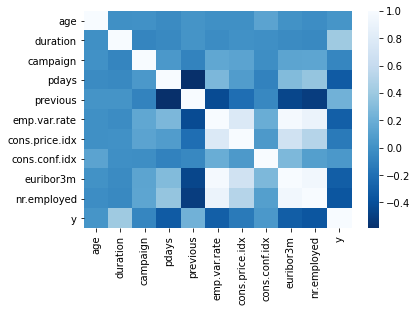

In [16]:
sns.heatmap(df.corr() ,cmap='Blues_r')

From the initial heatmap, there doesn't appear to be a strong correlation between a term deposit subscription and our quantitative variables. Duration and previous have the strongest correlations, but we will not keep duration in mind because of the concern from the dataset provider.

In [17]:
# Function to label the count on top of each bar in graph
def label_values(ax, spacing=5):
    total = 0
    for rect in ax.patches:
        total += rect.get_height()

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        
        va = 'bottom'
        
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.2f}, {:.2f}".format(y_value, y_value/total*100)
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va) 

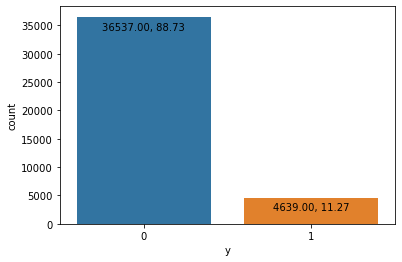

In [18]:
ax = sns.countplot(x = df["y"])  #Imbalanced dataset
label_values(ax, spacing=-15)
plt.show()

In [19]:
var_categorical = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", 
                  "poutcome"]
var_numerical = ["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx",
                "euribor3m", "nr.employed"]

10 10
Job


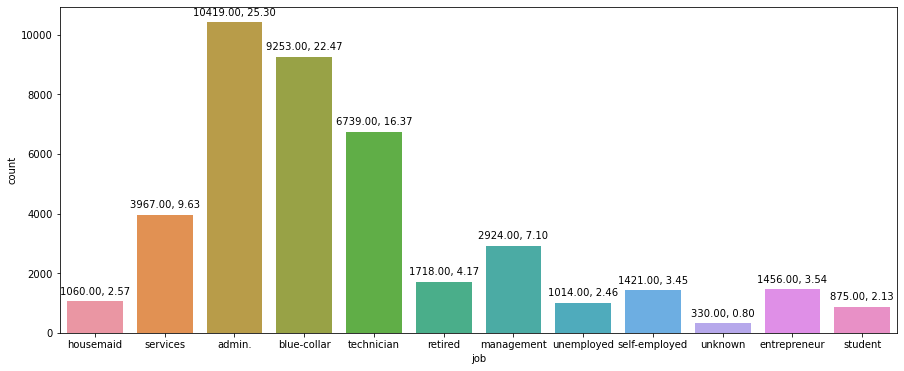

Marital


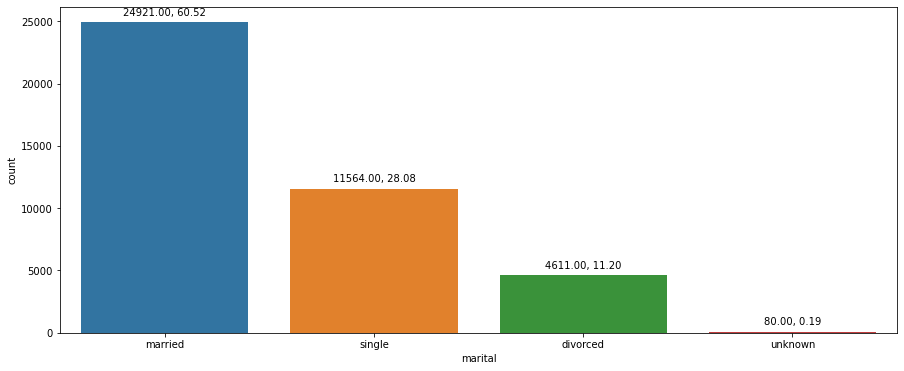

Education


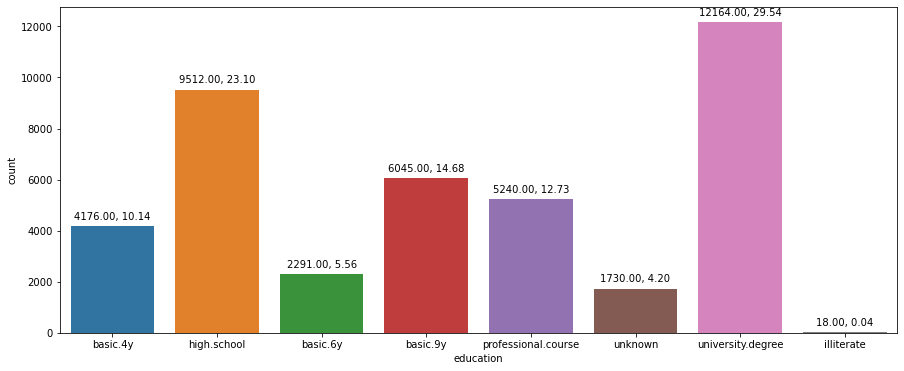

Default


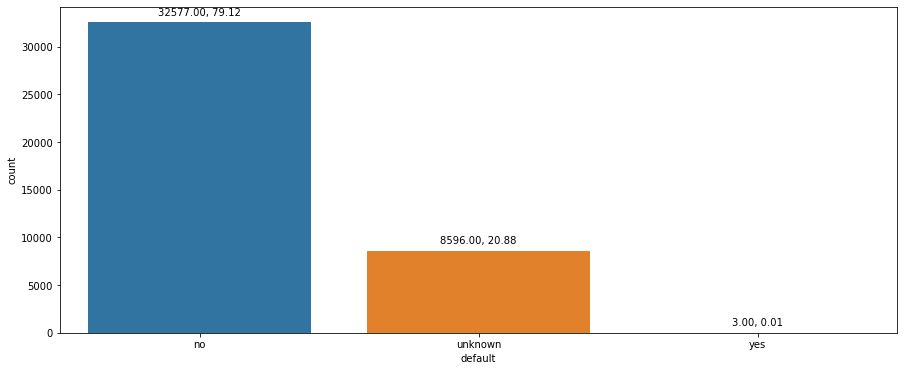

Housing


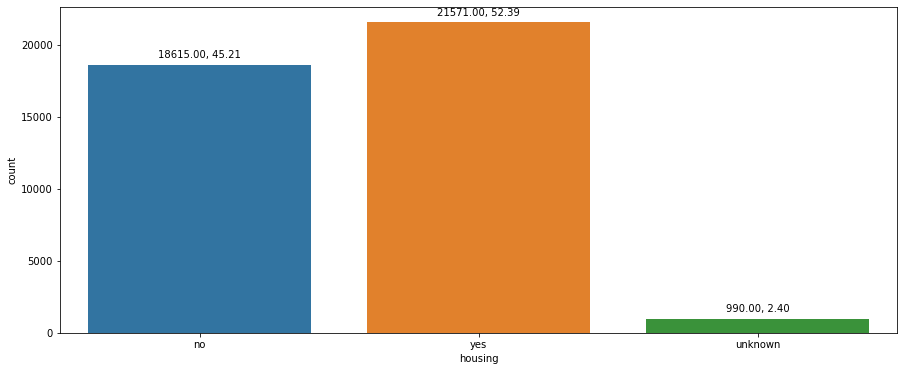

Loan


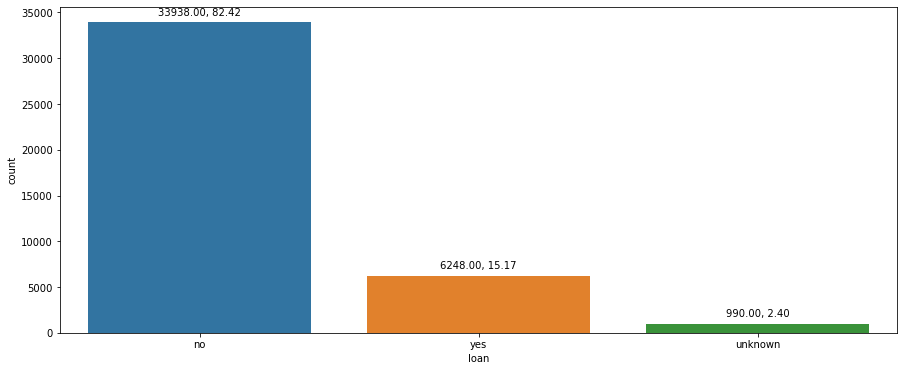

Contact


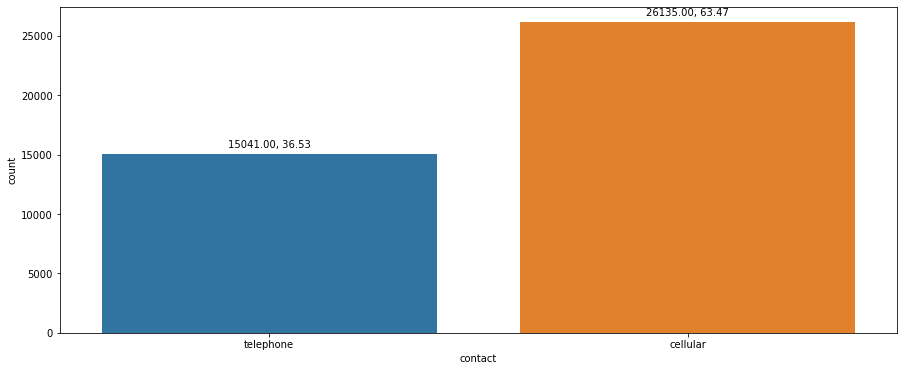

Month


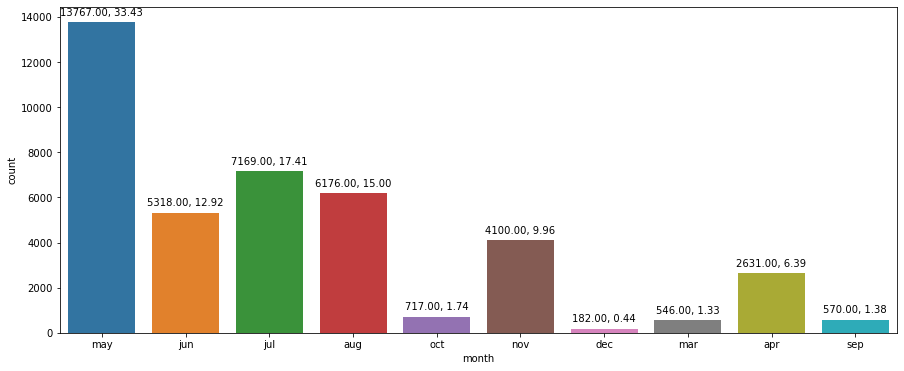

Day_Of_Week


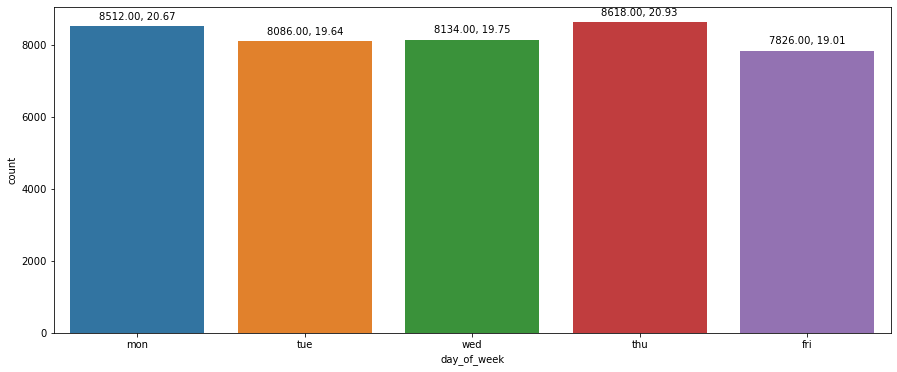

Poutcome


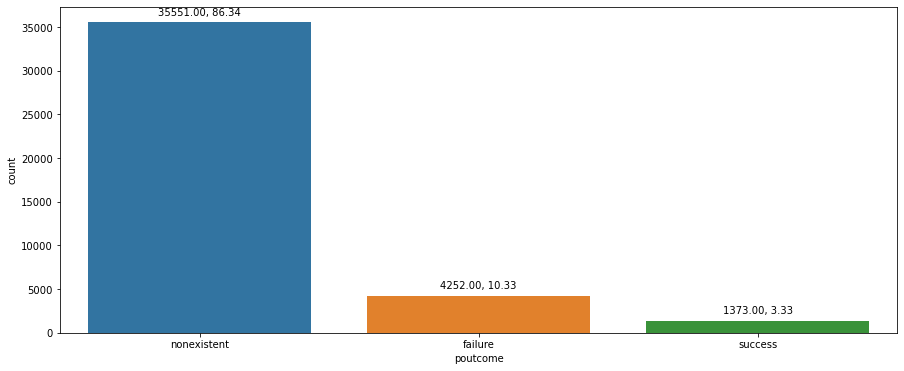

In [20]:

print(len(var_categorical), len(var_numerical))
for column in var_categorical:
    plt.figure(figsize=(15, 6))
    print(column.title())
    ax = sns.countplot(x = df[column])
    label_values(ax)
    plt.show()

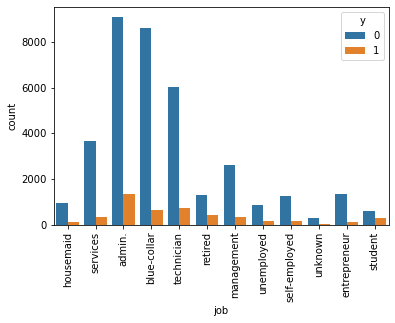

In [21]:
sns.countplot(x= 'job', hue = 'y', data=df )
plt.xticks(rotation=90);

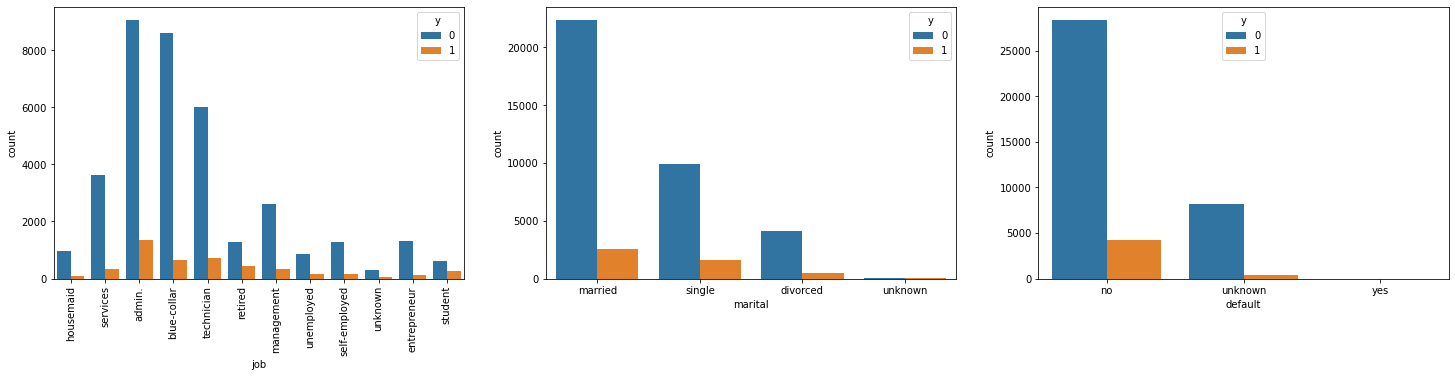

In [22]:
fig, axs =plt.subplots(1,3,figsize=(25, 5));
sns.countplot(x= 'job', hue = 'y', data=df, ax=axs[0]);
sns.countplot(x= 'marital', hue = 'y', data=df, ax=axs[1]);
sns.countplot(x= 'default', hue = 'y', data=df, ax=axs[2]);
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90);

Job: Highest Number (around 25%) of application are from admin type of job.

Default: Default variable has no impact on the client subscribing for term deposit. As we can see with no as input client took the term deposit and client having credit are not taking term deposit. So we will drop this feature.

Marital: Around 60% of client were approached were married.

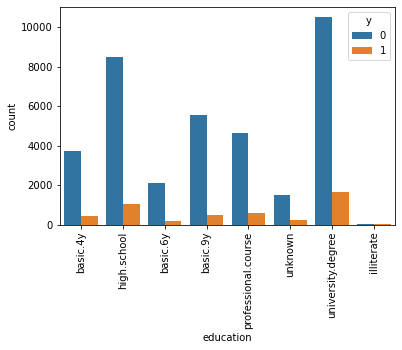

In [23]:
sns.countplot(x= 'education', hue = 'y', data=df);
plt.xticks(rotation=90);

Education: Client with university degree and high school were approached more as compare to other and they have higher success rate as well. (in terms of term deposit number)

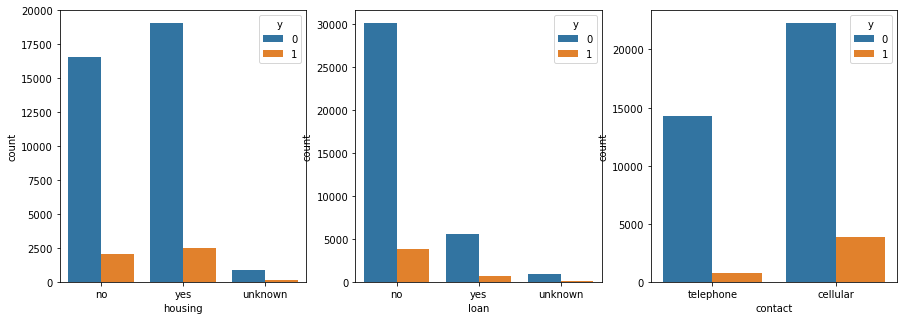

In [24]:
fig, axs =plt.subplots(1,3,figsize=(15, 5));
sns.countplot(x= 'housing', hue = 'y', data=df, ax=axs[0]);
sns.countplot(x= 'loan', hue = 'y', data=df, ax=axs[1]);
sns.countplot(x= 'contact', hue = 'y', data=df, ax=axs[2]);

Housing: Housing loan does not have much effect on the number of term deposit purchased.

Loan: We approach around 84% of client with not having personal loan. 

Contact: Around 64% calls are from cellular.

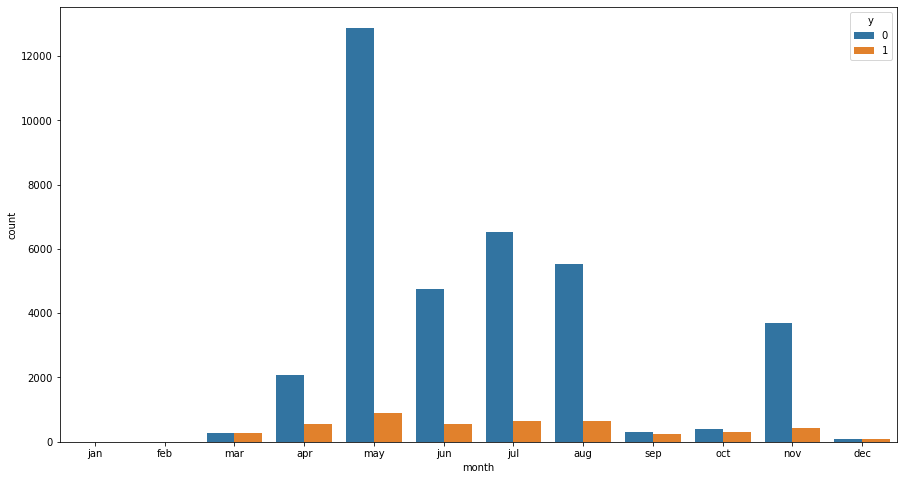

In [25]:
fig, axs =plt.subplots(1,1,figsize=(15, 8));
sns.countplot(x= 'month', hue = 'y', data=df, order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']);

Month: Around 33% were approached in may and in January, Febuary we don't have data or no one was approached. Success rate was almost same in june, july and August. 

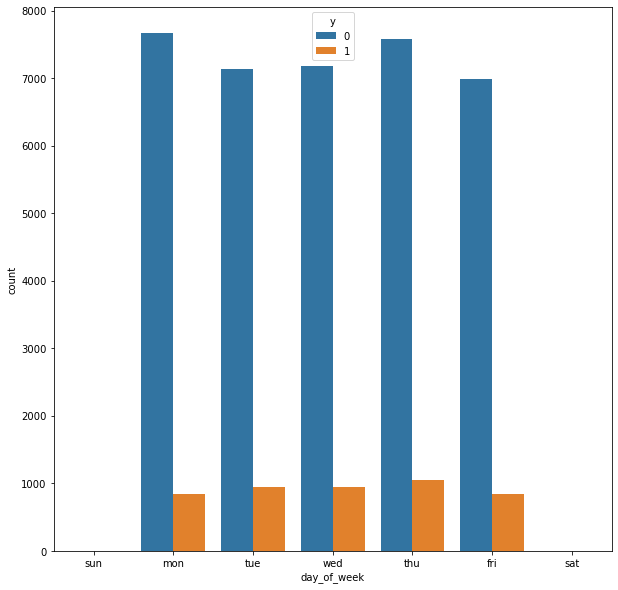

In [26]:
fig, axs =plt.subplots(1,1,figsize=(10, 10));
sns.countplot(x= 'day_of_week', hue = 'y', data=df, order=['sun','mon','tue','wed','thu','fri','sat']);

day_of_week: We have 5 days collected values. There is no significant different in the number of client approached and number of people subscribed.

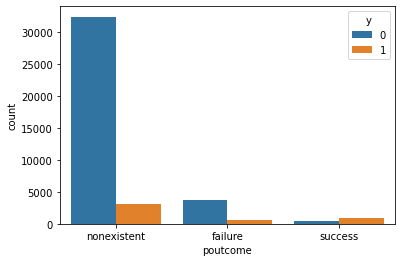

In [27]:
plt.figsize=(10, 10);
sns.countplot(x= 'poutcome', hue = 'y', data=df);

poutcome: If a client took the term deposit last time than there is higher chances of that client subscribing to it again

In [28]:
# Default variable has no impact on the client subscribing for term deposit.

df.drop(["default"], axis = 1, inplace=True)

/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [29]:
var_categorical = list(set(var_categorical) - set(['default']))

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   housing         41176 non-null  object 
 5   loan            41176 non-null  object 
 6   contact         41176 non-null  object 
 7   month           41176 non-null  object 
 8   day_of_week     41176 non-null  object 
 9   duration        41176 non-null  int64  
 10  campaign        41176 non-null  int64  
 11  pdays           41176 non-null  int64  
 12  previous        41176 non-null  int64  
 13  poutcome        41176 non-null  object 
 14  emp.var.rate    41176 non-null  float64
 15  cons.price.idx  41176 non-null  float64
 16  cons.conf.idx   41176 non-null  float64
 17  euribor3m       41176 non-null 

# Outliers Analysis

In [31]:
# Outliers are mainly found in duration. Changes will need to be made.

#plt.figure(figsize=(14,6))
#df.boxplot()
#print()

In [42]:
df_clean = df.copy()

In [43]:
#def get_upper_lower(data):
#    percentile25 = data.quantile(0.25)
#    percentile75 = data.quantile(0.75)
#    iqr = percentile75 - percentile25
#    upper_limit = percentile75 + 1.5 * iqr
#    lower_limit = percentile25 - 1.5 * iqr
#    return upper_limit, lower_limit
#


# Duration analysis

In [44]:
#fig, ax = plt.subplots(1,2, figsize=(14,3))
#sns.histplot(ax=ax[0], x='duration', data=df_clean)
#sns.boxplot(ax=ax[1], x='duration', data=df_clean)

In order to remove outliers from this skewed distribution, we will define a function to get the upper and lower limits based on the IQR

In [45]:
#upper_limit, lower_limit = get_upper_lower(df_clean['duration'])
#print('upper_limit: ', upper_limit)
#print('lower_limit: ', lower_limit)

In [46]:
#len(df_clean)

In [47]:
#df_clean = df_clean[(df_clean['duration'] >= lower_limit ) & (df_clean['duration'] <= upper_limit)]

In [48]:
#fig, ax = plt.subplots(1,2, figsize=(14,3))
#sns.histplot(ax=ax[0], x='duration', data=df_clean)
#sns.boxplot(ax=ax[1], x='duration', data=df_clean)

In [49]:
#print('We removed {} outliers!'.format(len(df)-len(df_clean)))

In [50]:
#plt.figure(figsize=(14,6))
#df_clean.boxplot()
#print()

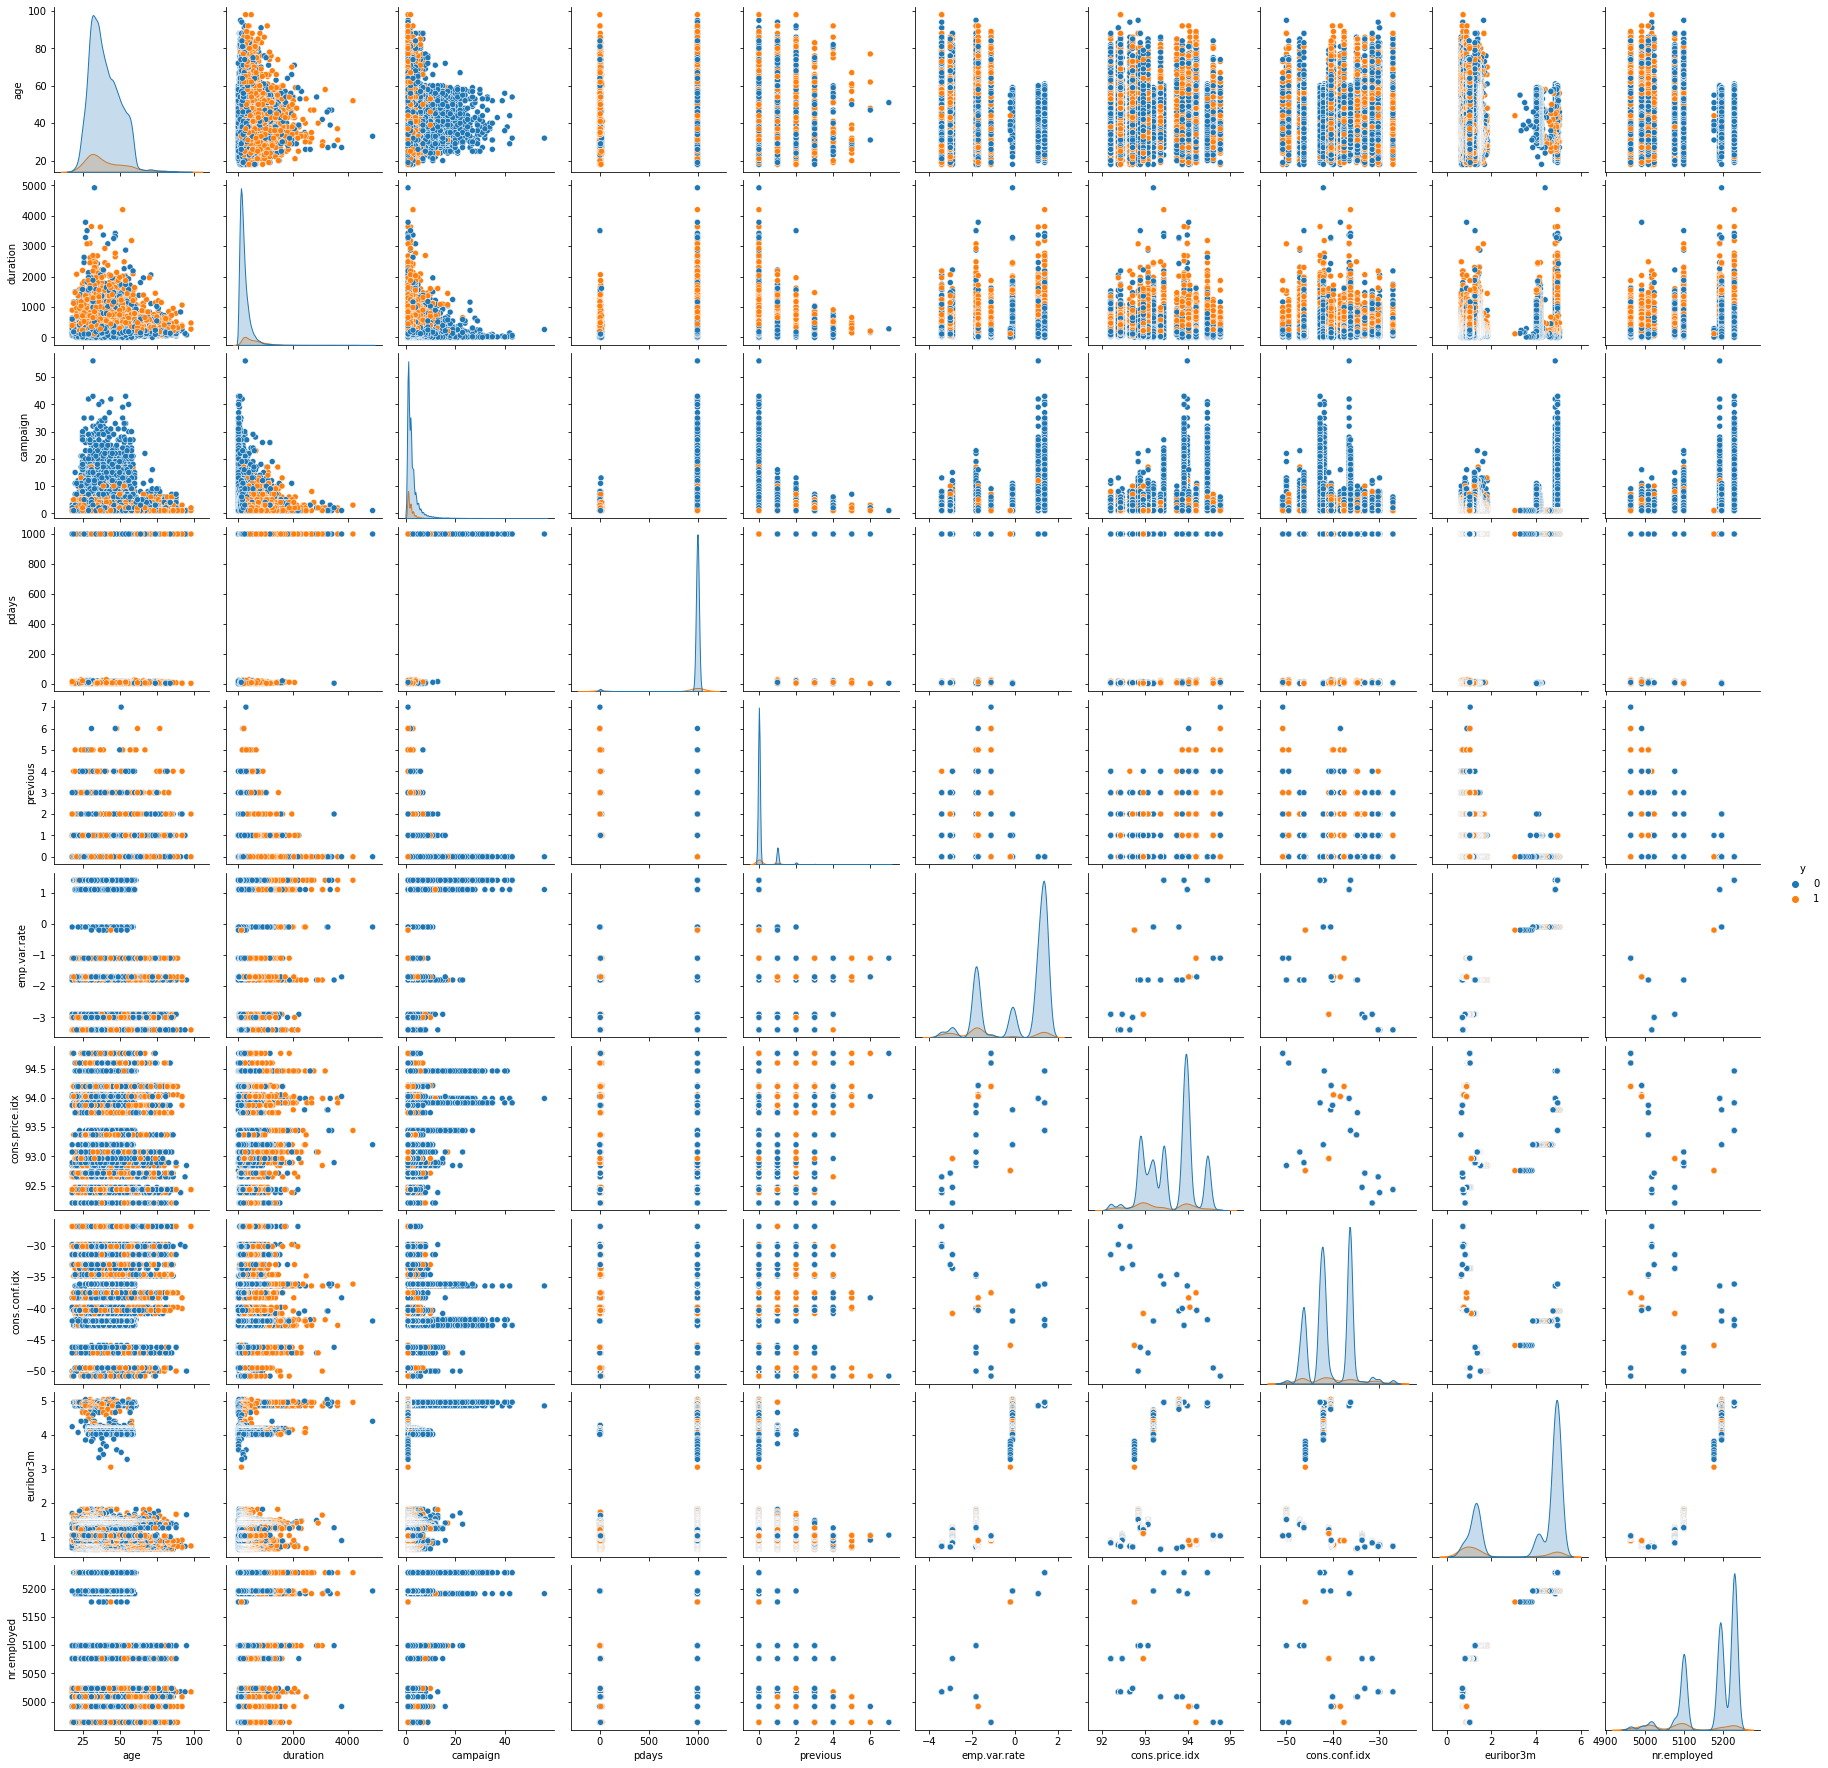

In [51]:
# visualizing numerical columns
sns.pairplot(hue='y', data = df_clean)
plt.show()

# Correlations

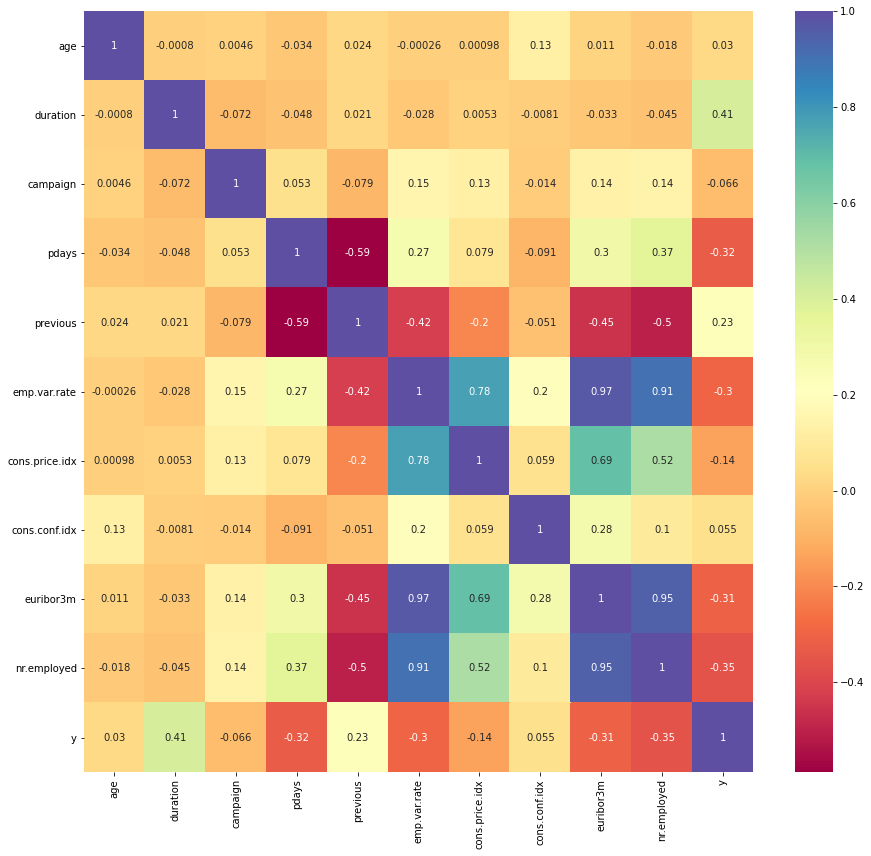

In [52]:
plt.figure(figsize=(15, 14))
sns.heatmap(df_clean.corr(), annot=True, cmap='Spectral')
plt.show()

Positive high correlation between: 
1. 'emp.var.rate' and 'nr.employed' 
2. 'emp.var.rate' and 'euribor3m' 
3. 'euribor3m' and 'nr.employed'

In [53]:
df_clean.corr()['y'].drop('y').sort_values()

nr.employed      -0.354669
pdays            -0.324948
euribor3m        -0.307740
emp.var.rate     -0.298289
cons.price.idx   -0.136134
campaign         -0.066361
age               0.030392
cons.conf.idx     0.054802
previous          0.230202
duration          0.405297
Name: y, dtype: float64

# Fit scikit-learn model

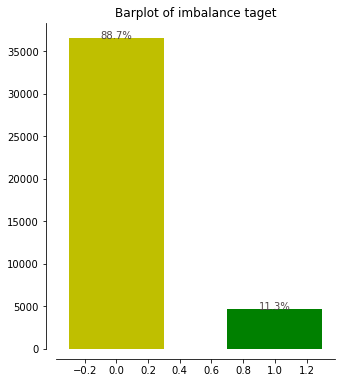

In [54]:
fig, ax = plt.subplots(figsize=(5,6))

ax.bar(df_clean['y'].unique(), df_clean['y'].value_counts(),width=0.6,color=['y','g'])
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/len(df_clean)), (p.get_x()+p.get_width()/3, p.get_height()+9),color='#4f4646')
    
ax.set_title("Barplot of imbalance taget")
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig("imbalance.png")
plt.show()

# Preprocessing

In [63]:
# replace the no previous call rows(noted 999) in pdays
df_clean['pdays'].replace({999:0}, inplace=True)


In [56]:
X = df_clean.drop(columns=['y'])
y = df_clean['y']

In [57]:
X.shape

(41176, 19)

In [64]:
y.shape

(41176,)

In [65]:
# Split the data into train, validation, and test set
X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

In [66]:
categorical_columns = (X.dtypes == object)

con_pipe = Pipeline([('imputer', SimpleImputer(strategy='median', add_indicator=True)),
                     ('scaler', StandardScaler())])

cat_pipe = Pipeline([('imputer', SimpleImputer(strategy='most_frequent',missing_values="unknown", add_indicator=True)),
                     ('ohe', OneHotEncoder())])

preprocessing = ColumnTransformer([('categorical', cat_pipe,  categorical_columns),
                                   ('continuous',  con_pipe, ~categorical_columns),
                                   ])

# 1.Baseline - Logistic Regression

In [67]:
pipe1 = Pipeline([('preprocessing',preprocessing),
                 ('lr',LogisticRegression(class_weight="balanced"))]) 
pipe1.fit(X_train,y_train)


/Users/elyasm/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 missing_values='unknown',
                                                                                 strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  age               False
job                True
marital            True
education          True
housing            True
loan               True
contact            True
month              True
day_of_week        True
duration          False
campaign          False
pdays             False
pre...


In [68]:
pipe1.score(X_train,y_train)

0.8617071801735676

In [70]:
pipe1.score(X_val,y_val)

0.85675430643699

## 2. Random Grid Search -> RandomForest
---
Use RandomizedSearchCV to search for the hyperparameter and the best performing model 

In [71]:
# Dummy estimator to tune hyperparameter 
class DummyEstimator(BaseEstimator):
    "Pass through class, methods are present but do nothing."
    def fit(self): pass
    def score(self): pass

In [72]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5,10,15,20,25,50,75,100]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
max_samples_leaf = [10, 20, 30, 50]
# Method of selecting samples for training each tree
bootstrap = [True, False]

pipe_dummy = Pipeline([('preprocessing',preprocessing),
                        ('clf', DummyEstimator())])

search_space = [{'clf': [ExtraTreesClassifier(),RandomForestClassifier()], # Actual Estimator
                 'clf__max_depth': max_depth,
                 'clf__n_estimators':n_estimators,
                 'clf__bootstrap':bootstrap,
                 'clf__max_features': max_features,
                 'clf__max_leaf_nodes': max_samples_leaf,
                 'clf__criterion': ['gini', 'entropy']}]
    

clf_algos_rand = RandomizedSearchCV(estimator=pipe_dummy, 
                                    param_distributions=search_space, 
                                    n_iter=40,
                                    cv=7, 
                                    n_jobs=-1,
                                    scoring='f1_weighted',
                                    verbose=1)


best_model = clf_algos_rand.fit(X_train, y_train);
best_model.best_params_, best_model.best_score_



Fitting 7 folds for each of 40 candidates, totalling 280 fits


({'clf__n_estimators': 400,
  'clf__max_leaf_nodes': 50,
  'clf__max_features': 'auto',
  'clf__max_depth': 100,
  'clf__criterion': 'gini',
  'clf__bootstrap': False,
  'clf': RandomForestClassifier(bootstrap=False, max_depth=100, max_leaf_nodes=50,
                         n_estimators=400)},
 0.886286374447475)

# Train Random Forest model 

In [73]:
pipe2 = Pipeline([('preprocessing',preprocessing),
                 ('rf', RandomForestClassifier(bootstrap=False, max_depth=100, max_features='auto',
                         max_leaf_nodes=50, n_estimators=400))])
pipe2.fit(X_train, y_train)
pipe2.score(X_val,y_val)

0.9045460432586453

## 3. Ensemble

In [74]:
knn_clf = KNeighborsClassifier()
dt_clf  = DecisionTreeClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(estimators = [('knn', knn_clf), 
                                            ('dt', dt_clf), 
                                            ('svc',svm_clf)],
                              voting = 'hard')
pipe3 = Pipeline([('preprocessing',preprocessing),
                 ('clf', voting_clf)])
pipe3.fit(X_train, y_train)
pipe3.score(X_val, y_val)

0.9114104390622977

# 4.Evaluation Metric

In [75]:
y_pred1 = pipe1.predict(X_val)
y_pred2 = pipe2.predict(X_val)
y_pred3 = pipe3.predict(X_val)

In [76]:
# Confusion Matrix
print("Logistic Regression:\n",confusion_matrix(y_val,y_pred1))
print("Random Forest:\n",confusion_matrix(y_val,y_pred2))
print("Ensembled Model\n:",confusion_matrix(y_val,y_pred3))

Logistic Regression:
 [[5838 1006]
 [ 100  777]]
Random Forest:
 [[6773   71]
 [ 666  211]]
Ensembled Model
: [[6642  202]
 [ 482  395]]


In [77]:
# Pipeline score 
print("logistic Regression:",pipe1.score(X_test,y_test))
print("Random Forest:",pipe2.score(X_test,y_test))
print("Ensemble model:",pipe3.score(X_test,y_test))

logistic Regression: 0.8575869438507868
Random Forest: 0.9048960559549252
Ensemble model: 0.9037303283466097


In [78]:
# F1_score
print("logistic Regression:",f1_score(y_val, y_pred1, average='weighted'))
print("Random Forest:",f1_score(y_val, y_pred2, average='weighted'))
print("Ensemble model:",f1_score(y_val, y_pred3, average='weighted'))

logistic Regression: 0.8760724620299964
Random Forest: 0.8820324790625556
Ensemble model: 0.9038841589697799


In [79]:
from sklearn.inspection import permutation_importance
r = permutation_importance(pipe1, X_val, y_val,
                           n_repeats=30,
                           random_state=0)

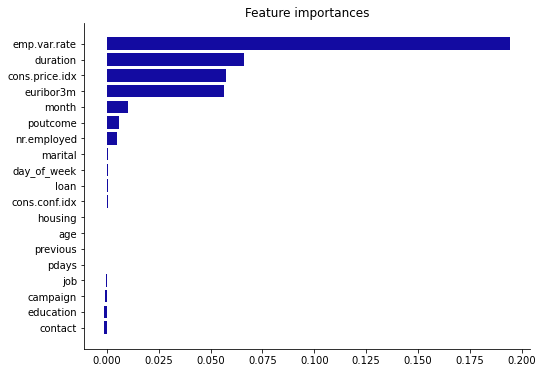

In [80]:

index = r.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(8,6))

ax.barh(X_train.columns[index],r.importances_mean[index],
        color="#130ba1", align="center")
ax.set_title("Feature importances")
# ax.spines['left'].set_position(('outward', 10))
# ax.spines['bottom'].set_position(('outward', 10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# plt.savefig("feature_impotance.png")
plt.show()

# Test Set Evaluation

In [81]:
pipe3.score(X_test, y_test)

0.9037303283466097